In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sklearn.__version__

<IPython.core.display.Javascript object>

'1.6.0'

In [4]:
df = pd.read_csv("kidney_dataset.csv")

In [5]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.head(-20)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,70.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,48,9700,5.6,no,no,no,good,no,no,notckd
376,376,58.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,9100,5.2,no,no,no,good,no,no,notckd
377,377,64.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6400,4.8,no,no,no,good,no,no,notckd
378,378,71.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,42,7700,5.5,no,no,no,good,no,no,notckd


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [11]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
anemia                       1
appetite                     1
pedal_edema                  1
id                           0
classification               0
dtype: int64

In [12]:
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=cols_names, inplace=True)

In [13]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [14]:
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] categories.

coronary_artery_disease has ['no' 'yes' '\tno' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'ckd\t' 'notckd'] categories.



In [15]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'no':'no','yes':'yes',' yes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = 'no', value='no')
df['classification'] = df['classification'].replace(to_replace = 'ckd', value = 'ckd')

In [16]:
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' '\tno' '\tyes' nan] categories.

coronary_artery_disease has ['no' 'yes' '\tno' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'ckd\t' 'notckd'] categories.



C:\Users\khush\AppData\Local\Temp\ipykernel_15260\190166352.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df[feats], ax=ax)
C:\Users\khush\AppData\Local\Temp\ipykernel_15260\190166352.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df[feats], ax=ax)
C:\Users\khush\AppData\Local\Tem

ValueError: could not convert string to float: '\t?'

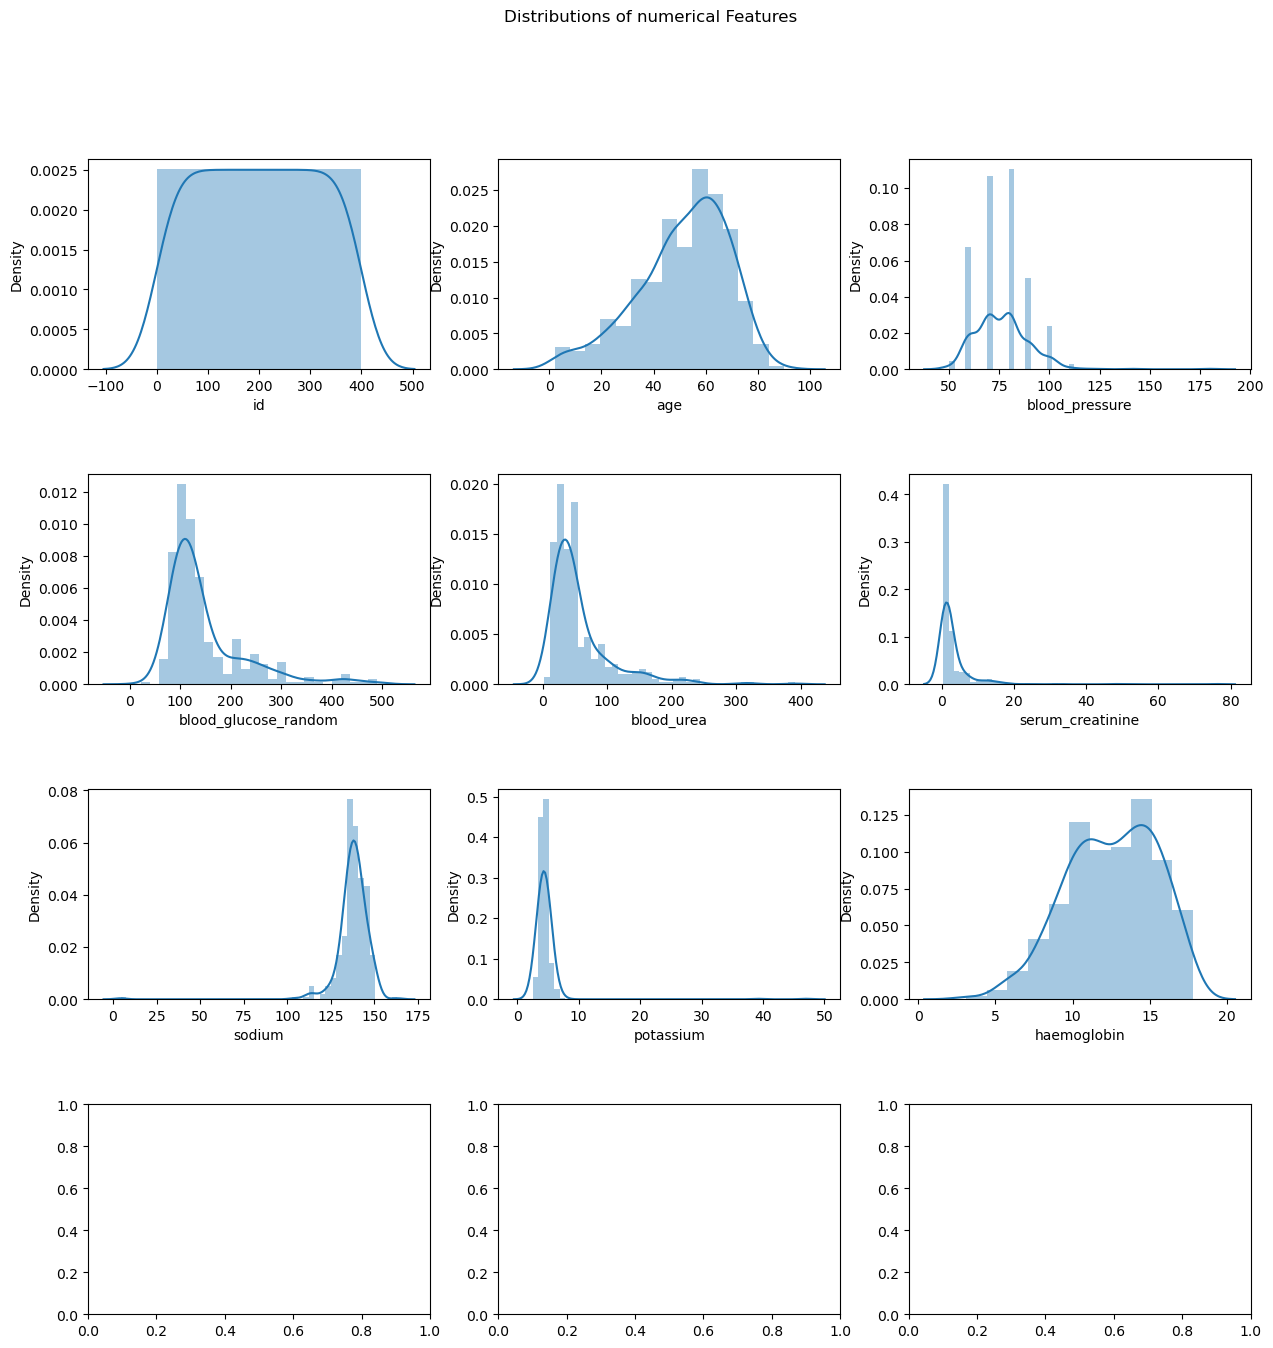

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')


for ax, feats in zip(axes.flatten(), numerical_features):
    sns.distplot(a=df[feats], ax=ax)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


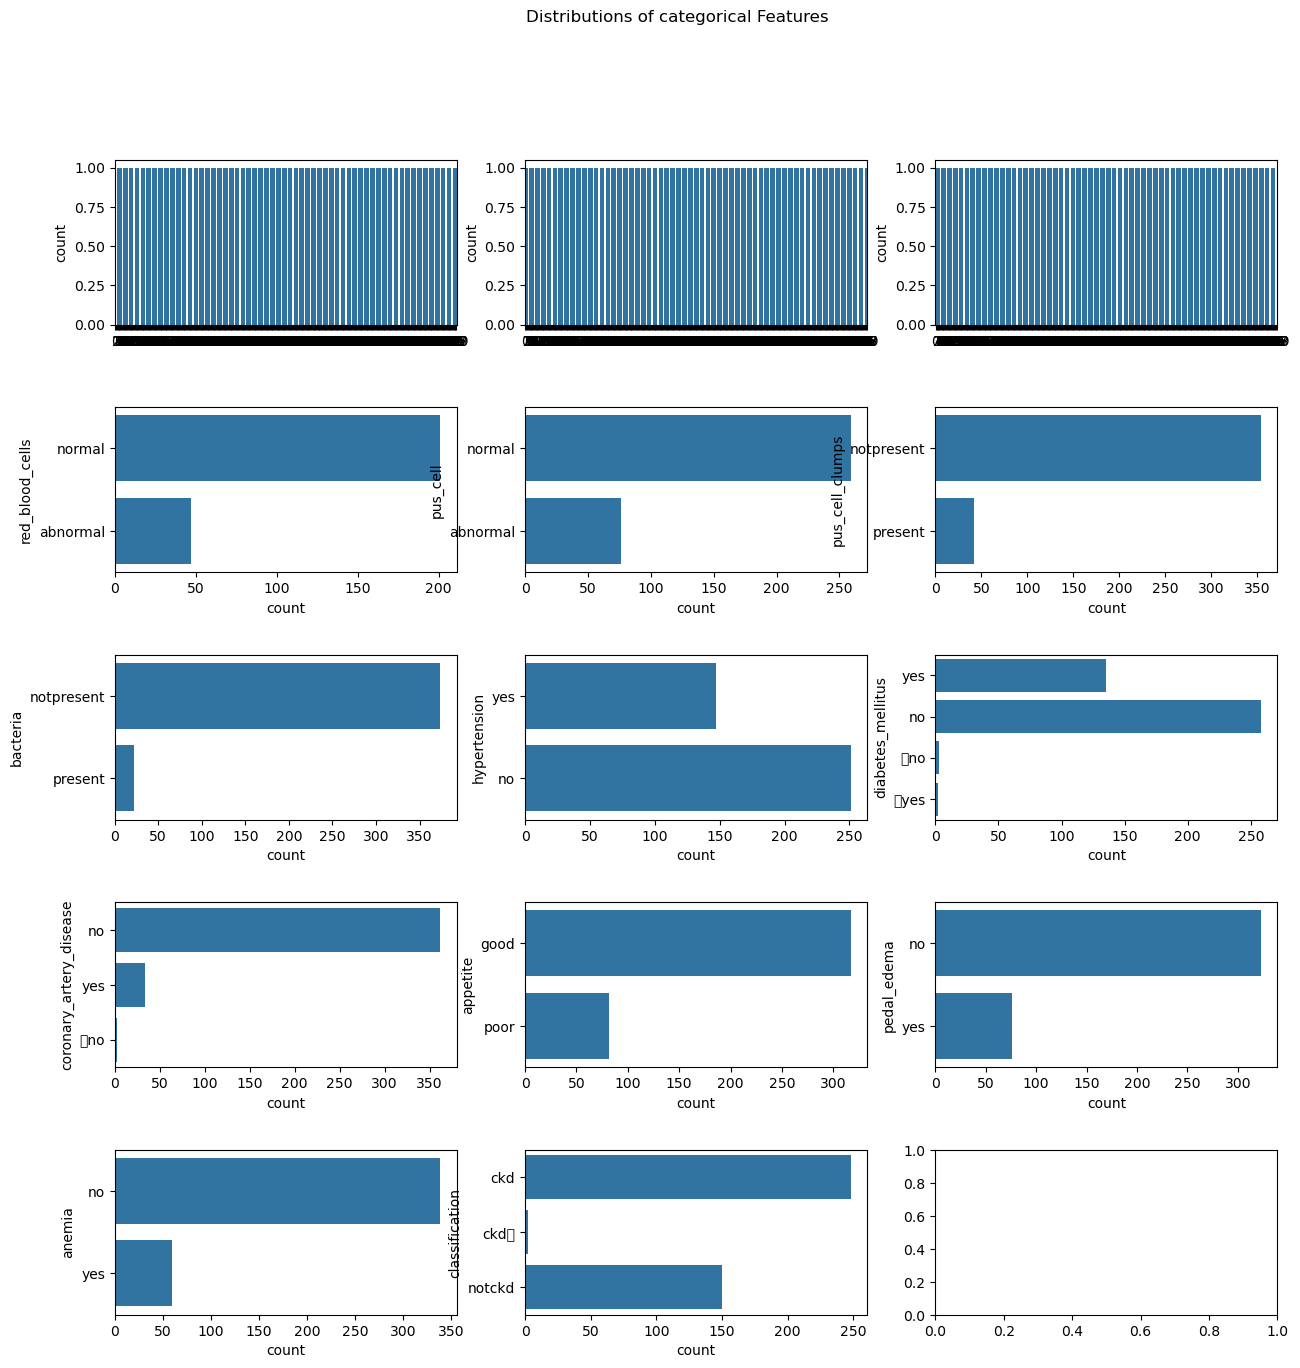

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for ax, feats in zip(axes.flatten(), categorical_features):
    sns.countplot(df[feats], ax=ax)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


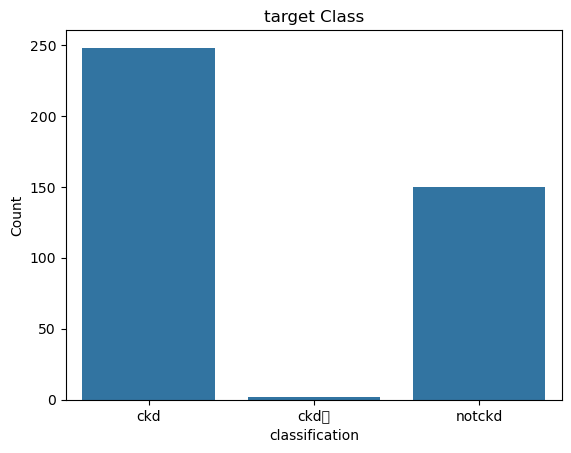

Percent of chronic kidney disease sample:  62.0 %
Percent of not a chronic kidney disease sample:  37.5 %


In [19]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']=='ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']=='notckd'])/len(df['classification'])*100,2),"%")

In [14]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different features')
plt.show()

ValueError: could not convert string to float: 'normal'

In [21]:
df = pd.read_csv("kidney_dataset.csv")

In [22]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0)
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})

C:\Users\khush\AppData\Local\Temp\ipykernel_15260\1257392180.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
C:\Users\khush\AppData\Local\Temp\ipykernel_15260\1257392180.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
C:\Users\khush\AppData\Local\Temp\ipykernel_15260\1257392180.py:3: FutureWarning: Downcasting behavior in `replace` is de

In [23]:
df.drop('id',axis=1,inplace=True)
df = df.dropna(axis=0)

In [24]:
cols = ['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc']
X = df[cols]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=44, stratify= y)
print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

<IPython.core.display.Javascript object>

Shape training set: X:(105, 7), y:(105,)
Shape test set: X:(53, 7), y:(53,)


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

<IPython.core.display.Javascript object>

Accuracy : 0.9811320754716981


In [27]:
clf_report = classification_report(y_test, y_pred)
print('Classification report')
print("---------------------")
print(clf_report)
print("_____________________")

Classification report
---------------------
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        39
         1.0       1.00      0.93      0.96        14

    accuracy                           0.98        53
   macro avg       0.99      0.96      0.98        53
weighted avg       0.98      0.98      0.98        53

_____________________


In [28]:
input_data= (70,1.020,0,0,0,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[0.]


C:\Users\khush\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
if (prediction[0] == 1):
  print('The person has kidney disease.')
else:
  print('The person has no kidney disease.')

The person has no kidney disease.


In [35]:
pickle.dump(model,open('Kidney_model_predion.pkl','wb'))

<IPython.core.display.Javascript object>